In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# Topics

* Standard deviation
* Plot histogram
* Calculate population mean
* Standard deviation
* Standard error
* T-statistic
* Degrees of freedom
* T-critical
* Confidence interval 
* R-squared
* Hypothesis
* Pooled variance

In [2]:
red = pd.read_csv("data/winequality-red.csv",sep=";")
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wh = pd.read_csv("data/winequality-white.csv",sep=";")
wh

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
# create df with new columns "wine" category

red1=red
red1['wine'] = pd.Series("red", index=red.index)
red1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [5]:

wh1=wh
wh1['wine'] = pd.Series("white", index=wh1.index)
wh1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [6]:
# create new csv with new columns "wine" category

df_frames=[red1,wh1]
red_wh =pd.concat(df_frames)
red_wh

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
# save red_wh as csv

red_wh.to_csv("data/red_wh",index=False)

In [7]:
red_wh = pd.read_csv("data/red_wh")
red_wh

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [8]:
red_s = red1.sample(n=150)
wh_s = wh1.sample(n=150)
df_frames2=[red_s,wh_s]
red_wh_sample =pd.concat(df_frames2)
red_wh_sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
1402,7.6,0.300,0.42,2.0,0.052,6.0,24.0,0.99630,3.44,0.82,11.9,6,red
618,11.4,0.460,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.2,5,red
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5,red
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5,red
350,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,6.7,0.310,0.32,14.5,0.038,6.0,79.0,0.99412,3.14,0.34,12.5,5,white
1606,7.5,0.320,0.49,1.7,0.031,44.0,109.0,0.99060,3.07,0.46,12.5,6,white
4425,6.1,0.220,0.50,6.6,0.045,30.0,122.0,0.99415,3.22,0.49,9.9,6,white
982,5.1,0.390,0.21,1.7,0.027,15.0,72.0,0.98940,3.50,0.45,12.5,6,white


In [10]:
red_wh_sample = red_wh_sample[["sulphates","alcohol","quality","wine"]]
red_wh_sample 

,sulphates,alcohol,quality,wine
1402,0.82,11.9,6,red
618,0.70,10.2,5,red
1078,0.58,11.0,5,red
834,0.47,9.4,5,red
350,0.98,9.9,6,red
...,...,...,...,...
3232,0.34,12.5,5,white
1606,0.46,12.5,6,white
4425,0.49,9.9,6,white
982,0.45,12.5,6,white


In [ ]:
red_wh_sample.to_csv("data/red_wh_sample",index=False)

# What is standard devation?
# $$\sigma(sigma) $$


# the dispersion of a dataset relative to its mean and is calculated as the square root of the variance.

#### standard deviation : low = closely clustered around the mean ( blue distribution)
#### standard deviation : High = dispresed over wider range of values (green distribution)

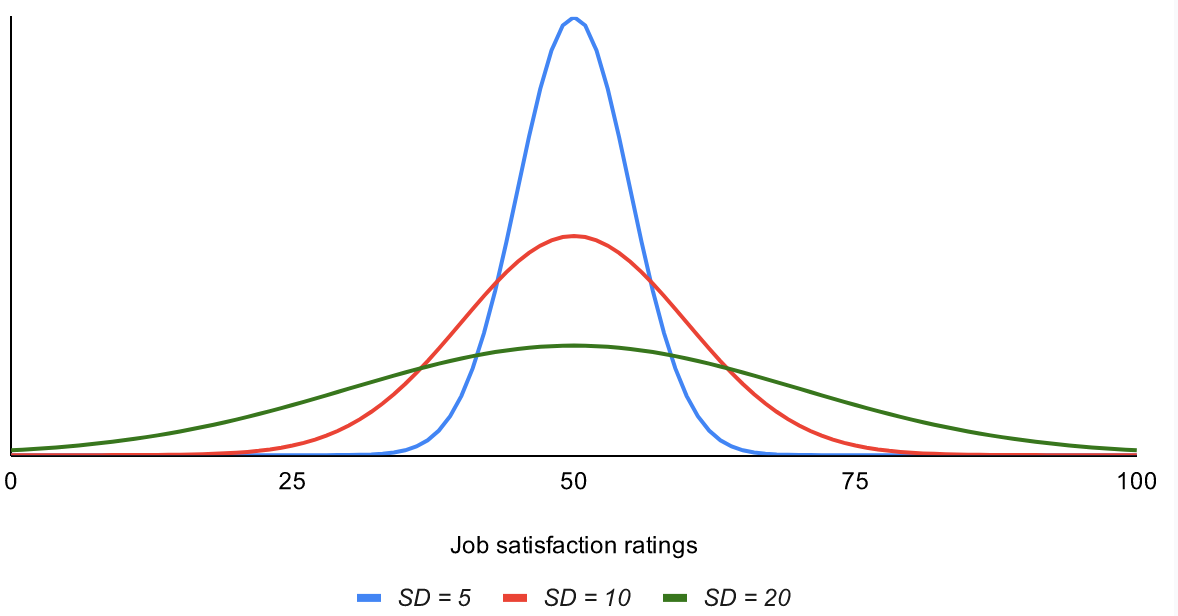

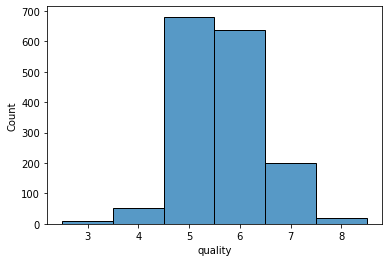

In [10]:
sns.histplot(data=red, x="quality", discrete=True)

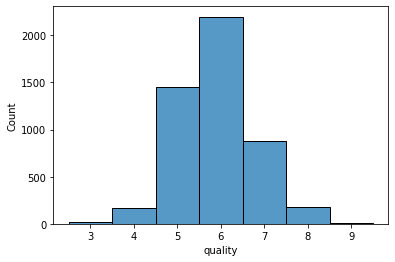

In [24]:
sns.histplot(data=wh, x="quality", discrete=True)

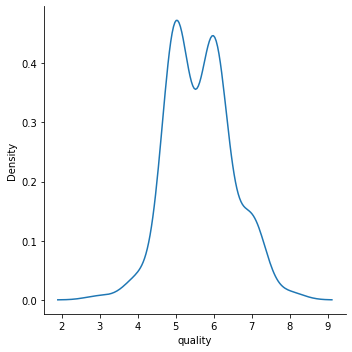

In [14]:
# parameter "bw_adjust", the curve is more smooth when the number is bigger

sns.displot(red, x="quality", kind="kde",bw_adjust=2)

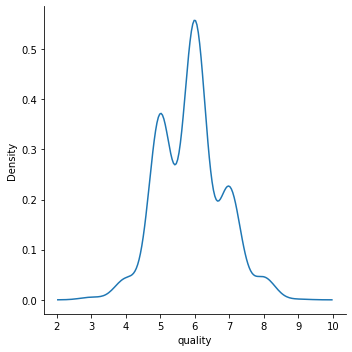

In [15]:
sns.displot(wh, x="quality", kind="kde",bw_adjust=2)

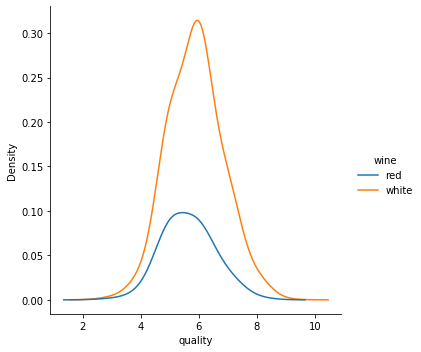

In [16]:
# distribution of red and white quality

sns.displot(red_wh, x="quality",  hue="wine", kind="kde",bw_adjust=3)

* Since the distance between two sample means is small, the population means will be less likely to differ significantly.(between group variability)

* White's variability is greater than red one.

In [5]:
# population mean of "quality"
xbar_red = red.quality.mean()
xbar_red

5.6360225140712945

In [6]:
# standard deviation of "quality"
red_std = red.quality.std()
red_std

0.8075694397347023

In [7]:
# population mean of "quality"
xbar_wh = wh.quality.mean()
xbar_wh

5.87790935075541

In [8]:
# population mean of "quality"
wh_std = wh.quality.std()
wh_std

0.8856385749678454

In [9]:
# Standard error for independent samples (meaning that two samples(red and white) are different groups)

standard_err = math.sqrt((red_std**2/len(red))+(wh_std**2/len(wh)))
standard_err

0.02383271100605766

In [10]:
# t-statistic minus
t_stats_m =(xbar_red-xbar_wh)/standard_err
t_stats_m

-10.149363059143143

In [11]:
# t-statistic plus
t_stats_p = (xbar_wh-xbar_red)/standard_err
t_stats_p

10.149363059143143

In [12]:
# t-statats = +- 10.149

In [13]:
# degrees of freedom
dof = len(red)+ len(wh)-2
dof

6495

In [14]:
len(red)

1599

In [15]:
len(wh)

4898

* t-table https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg
* how to find t_critical = degrees of freedom = 6495 and alpha level (also one or two tailed direction?) = 0.05 for one direction, two tailed for 0.025

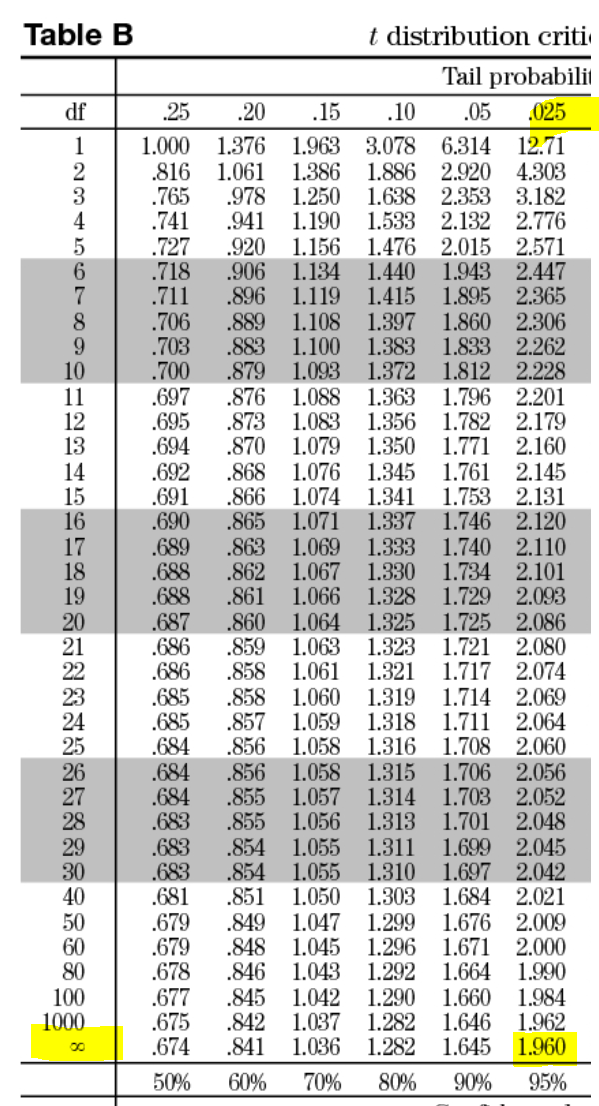

In [16]:
t_critical = 1.96
t_critical

1.96

In [17]:
# mean difference between two sample mean : for 95% CI
# negative difference 
xbar_diff = xbar_red-xbar_wh
xbar_diff

-0.2418868366841158

In [19]:
# mean difference between two sample mean : for 95% CI 
# positive difference
xbar_diff = xbar_wh-xbar_red
xbar_diff

0.2418868366841158

In [20]:
# 95% CI upper
upper = xbar_diff + t_critical*standard_err
upper

0.2885989502559888

In [21]:
# 95% CI lower
lower = xbar_diff -t_critical*standard_err
lower

0.1951747231122428

In [22]:
# 95% CI by stats model
interval= stats.t.interval(alpha=0.95,df=dof,loc=xbar_diff,scale=standard_err)
interval

(0.19516687506676536, 0.2886067983014663)

# What is r2 (r squared)?
* **A type of effect size meaure**
* **correlation** measure
* r2=(t_stats ** 2 ) / ((t_stats ** 2)+dof)

# Takeaway 
* the difference in xxx for the sample of xxx, XX% of those differences are due to xxx

In [25]:
# r-squared

r2 = (t_stats_p**2)/((t_stats_p**2) + dof)
r2

0.01561221901931782

# Hypothesis
* Ho: red and white's quality are the same
* Ha: rea and white's quality are not the same
* alpha level = 0.05


# Summary : Reject Ho


* conclusion : reject Ho. (t_crtical < t_stats) 
* confidence interval of "quality" variable mean difference between red and white ; 95% CI (0.195,0.288)
* t(6495) = +-10.14, p< .05, two-tailed direction
* Only 1.5% of the difference in quality can be explained by a type of wine( red or white) 

# Pooled variance version

In [26]:
# pd series to np array
red=red.quality.to_numpy()
red

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [27]:
# pd series to np array
wh=wh.quality.to_numpy()
wh

array([6, 6, 6, ..., 6, 7, 6], dtype=int64)

In [28]:
# mean of red. same as "red.mean()"
redbar=sum(red)/len(red)
redbar

5.6360225140712945

In [29]:
(red-redbar)**2

array([0.40452464, 0.40452464, 0.40452464, ..., 0.13247961, 0.40452464,
       0.13247961])

In [30]:
# sum od squart root
ss_red=sum((red-redbar)**2)
ss_red

1042.1651031894867

In [31]:
# mean of white
whbar=sum(wh)/len(wh)
whbar

5.87790935075541

In [32]:
(wh-whbar)**2

array([0.01490613, 0.01490613, 0.01490613, ..., 0.01490613, 1.25908743,
       0.01490613])

In [33]:
# sum od squart root
ss_wh=sum((wh-whbar)**2)
ss_wh

3840.989791751859

In [34]:
# pooled variance
pooled_var=(ss_red+ss_wh)/(len(red) + len(wh)-2)
pooled_var

0.7518329322465505

# What is pooled variance? 
* Pooled variance is used to **combine together variances from different samples** by taking their weighted average, to get the "overall" variance.

# Why/When do we use pooled variance? 
* For **independent sample t-test**, When the two (or more than two)groups of **sample size** of the poplulation is **different**. 
* For example, red wine' sample size is 1599. Wheras white wine's sample size is 4898. the two sample size is not the same, it is about 3 times difference between two datasets. 

In [42]:
# standard error used pooled variance
p_standard_err=sp.sqrt(pooled_var/len(red)+pooled_var/len(wh))
p_standard_err

C:\Users\yuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  


0.02497373411363374

In [46]:
t_stats_m=(redbar-whbar)/p_standard_err
t_stats_m

-9.685649554187581

In [47]:
t_stats_p=(whbar-redbar)/p_standard_err
t_stats_p

9.685649554187581

In [38]:
t_critical = 1.96
t_critical

1.96

In [41]:
# Mean difference between white and red
wh_red_bar_diff = whbar-redbar
wh_red_bar_diff

0.2418868366841158

In [45]:
# 95% CI by stats model
interval= stats.t.interval(alpha=0.95,df=dof,loc=wh_red_bar_diff,scale=p_standard_err)
interval

(0.19293009404017908, 0.29084357932805255)

In [48]:
# r-squared
r2 = (t_stats_p**2)/((t_stats_p**2) + dof)
r2

0.014238046256350511

# Summary : reject Ho. 
* Ho: red and white's quality are the same
* Ha: rea and white's quality are not the same
* alpha level = 0.05


* conclusion : reject Ho. (t_crtical 1.96 < t_stats +-9.68) 
* t(6495) = +-9.68, p< .05, two-tailed direction
* confidence interval of "quality" variable mean difference between red and white ; 95% CI (0.192, 0.290)
* Only 1.4% of the difference in quality can be explained by a type of wine(red or white) 